In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/parameters/Para_final_6.csv")
dataset.head()

,Aspect,DEM,DR,DD,FD,LULCC,NDVI,PC,Rainfall,slope,ST,TWI,Flooded
0,90.000000,4,0.005302,44.970600,16,1,0.125226,0.000000e+00,210.792999,0.760394,3745,-2.48031,1
1,213.690002,5,0.007498,37.785702,4,11,0.307862,-1.296010e+09,210.792999,1.973930,3745,-3.43460,1
2,26.565100,6,0.008383,22.412399,64,11,0.181474,1.555210e+09,210.792999,1.960510,3745,-4.12092,1
3,206.565002,5,0.013517,21.725000,16,11,0.231532,0.000000e+00,210.792999,1.038700,3745,-2.09911,1
4,209.054993,6,0.008383,26.562200,1,11,0.267723,-1.490410e+09,210.792999,2.051540,3745,-4.16634,1


In [2]:
# dataset checkout
print(dataset.shape)

(7077, 13)


In [3]:
# Data for fitting the models
data_inputs=dataset.iloc[:,0:12].values
print(data_inputs)

[[ 9.00000000e+01  4.00000000e+00  5.30170000e-03 ...  7.60394000e-01
   3.74500000e+03 -2.48031000e+00]
 [ 2.13690002e+02  5.00000000e+00  7.49770000e-03 ...  1.97393000e+00
   3.74500000e+03 -3.43460010e+00]
 [ 2.65650997e+01  6.00000000e+00  8.38270000e-03 ...  1.96051000e+00
   3.74500000e+03 -4.12092020e+00]
 ...
 [ 1.65466003e+02  2.50000000e+01  3.74890000e-03 ...  6.54011010e+00
   3.70700000e+03 -5.32962990e+00]
 [ 2.25000000e+02  1.30000000e+01  3.74890000e-03 ...  1.06322000e+00
   3.70700000e+03 -2.41013000e+00]
 [ 4.50000000e+01  9.00000000e+00  5.30170000e-03 ...  9.38525000e-01
   3.70700000e+03 -3.38396000e+00]]


In [4]:
data_outputs=dataset.iloc[:,-1].values
print(data_outputs)

[1 1 1 ... 0 0 0]


In [5]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data_inputs, data_outputs, test_size=0.25, random_state=42)

x_train[:3]

array([[ 3.44744995e+02,  1.80000000e+01,  5.30170000e-03,
         1.36845001e+02,  1.60000000e+01,  5.00000000e+00,
         5.17528000e-01,  3.69363994e+09,  2.56618988e+02,
         3.00032000e+00,  3.70700000e+03, -5.24009990e+00],
       [ 1.08434998e+02,  7.00000000e+00,  3.74890000e-03,
         5.17204018e+01,  1.00000000e+00,  8.00000000e+00,
        -9.99490000e-02,  0.00000000e+00,  1.90505005e+02,
         6.04327000e-01,  3.70700000e+03, -3.63685990e+00],
       [ 2.08300995e+02,  2.30000000e+01,  7.49770000e-03,
         7.60155010e+00,  1.60000000e+01,  2.00000000e+00,
         4.96643000e-01, -4.68557978e+09,  3.12653992e+02,
         3.57628990e+00,  3.66500000e+03, -3.33664990e+00]])

In [6]:

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error# Standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [7]:
# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# Train the model
model.fit(x_train_std, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
133/133 [==============================] - 1s 4ms/step - loss: 0.2366 - val_loss: 0.1571
Epoch 2/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1380 - val_loss: 0.1431
Epoch 3/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1257 - val_loss: 0.1388
Epoch 4/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1200 - val_loss: 0.1353
Epoch 5/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1164 - val_loss: 0.1309
Epoch 6/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1130 - val_loss: 0.1302
Epoch 7/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1116 - val_loss: 0.1327
Epoch 8/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.1295
Epoch 9/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.1292
Epoch 10/50
133/133 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 0.1270

In [10]:
# Evaluate the model on the test set
y_pred = model.predict(x_test_std)

56/56 [==============================] - 0s 1ms/step


In [11]:

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.13043954351732656


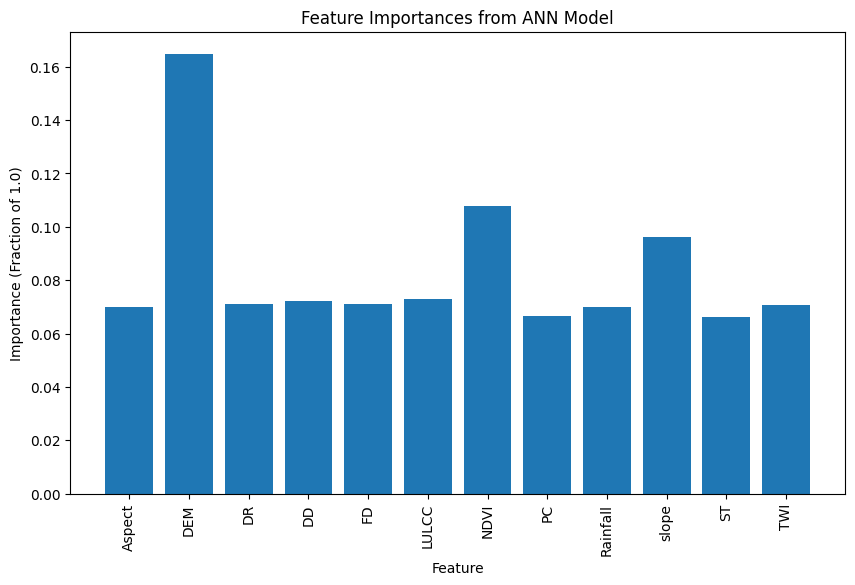

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Assuming 'X' and 'y' are your features and target variable
# Replace 'X' and 'y' with your actual features and target variable
X = dataset[['Aspect', 'DEM', 'DR', 'DD', 'FD', 'LULCC', 'NDVI', 'PC', 'Rainfall', 'slope', 'ST', 'TWI']]
y = dataset['Flooded']

# Train the neural network
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)  # Adjust parameters as needed
model.fit(X, y)

# Get weights from the trained neural network
weights = model.coefs_

# Calculate feature importances based on the weights
feature_importances = np.sum(np.abs(weights[0]), axis=1)  # Assuming the first layer is the input layer

# Normalize importances to fractions of 1.0
total_importance = np.sum(feature_importances)
feature_importances_fraction = feature_importances / total_importance

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_fraction})

# Plot feature importances with value annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align="center")

# # Add value annotations on top of each bar
# for bar, value in zip(bars, feature_importance_df['Importance']):
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, value, f'{value:.2f}', fontsize=9, va='bottom')

plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance (Fraction of 1.0)")
plt.title("Feature Importances from ANN Model")
plt.show()

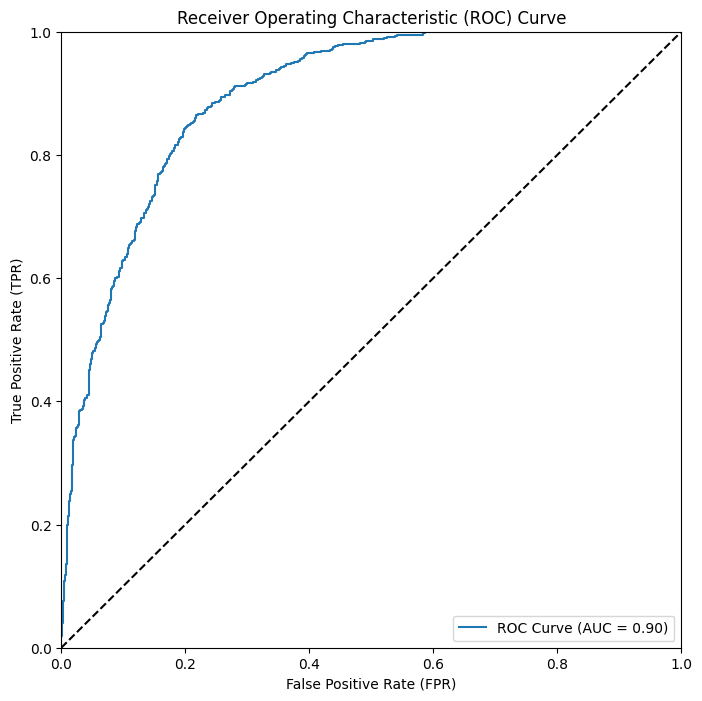

Accuracy: 81.47%
Recall: 79.53%
ROC AUC: 0.90


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier



# Build and train the ANN model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model.fit(x_train_std, y_train)

# Predict on the test set
y_pred = model.predict(x_test_std)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_pred) * 100

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_std)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Display evaluation metrics
print(f'Accuracy: {accuracy:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'ROC AUC: {roc_auc:.2f}')



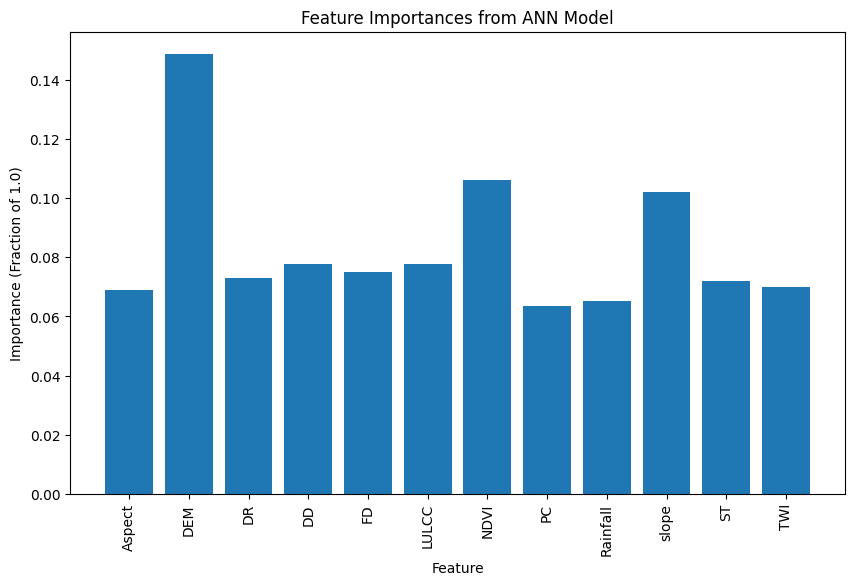

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Assuming 'X' and 'y' are your features and target variable
# Replace 'X' and 'y' with your actual features and target variable
X = dataset[['Aspect', 'DEM', 'DR', 'DD', 'FD', 'LULCC', 'NDVI', 'PC', 'Rainfall', 'slope', 'ST', 'TWI']]
y = dataset['Flooded']

# Train the neural network
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)  # Adjust parameters as needed
model.fit(X, y)

# Get weights from the trained neural network
weights = model.coefs_

# Calculate feature importances based on the weights
feature_importances = np.sum(np.abs(weights[0]), axis=1)  # Assuming the first layer is the input layer

# Normalize importances to fractions of 1.0
total_importance = np.sum(feature_importances)
feature_importances_fraction = feature_importances / total_importance

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_fraction})

# Plot feature importances with value annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align="center")

# # Add value annotations on top of each bar
# for bar, value in zip(bars, feature_importance_df['Importance']):
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, value, f'{value:.2f}', fontsize=9, va='bottom')

plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance (Fraction of 1.0)")
plt.title("Feature Importances from ANN Model")
plt.show()

